# Lab 4

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

import file for problem 1:

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

look at header of our single data set called 'data':

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [5]:
data = np.array(hf.get('data'))

Checking that data is as expected:
time (gps seconds), Solar phase (deg), Earth longitude (deg), and gamma-ray counts.

In [6]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

Close file

In [8]:
hf.close()

## Problem 1

In this problem we are looking at data from a gamma-ray satellite orbiting in low Earth orbit.

Features of this satellite:
- Takes reading of # of particles detected every 100 milliseconds
- Has approximately 90 minute orbit
- Looking for gamma-ray bursts, however virtually all of the particles detected are background cosmic rays

#### 1) Make plots and generally explore data. 

- Give a high level description of the data features you see
- Specifically comment on whether you see signal contamination
- Comment on how you plan to build a background pdf()

The data set has 4 columns:
Time in gps seconds, Solar phase degrees (showing the position of the sun relative to the earth orbit), Earth longitude degrees (giving the position of the spacecraft relative to the ground), and particle counts. 

First is a scatter plot:
- time vs. particle counts first 2000 data points starting at 0

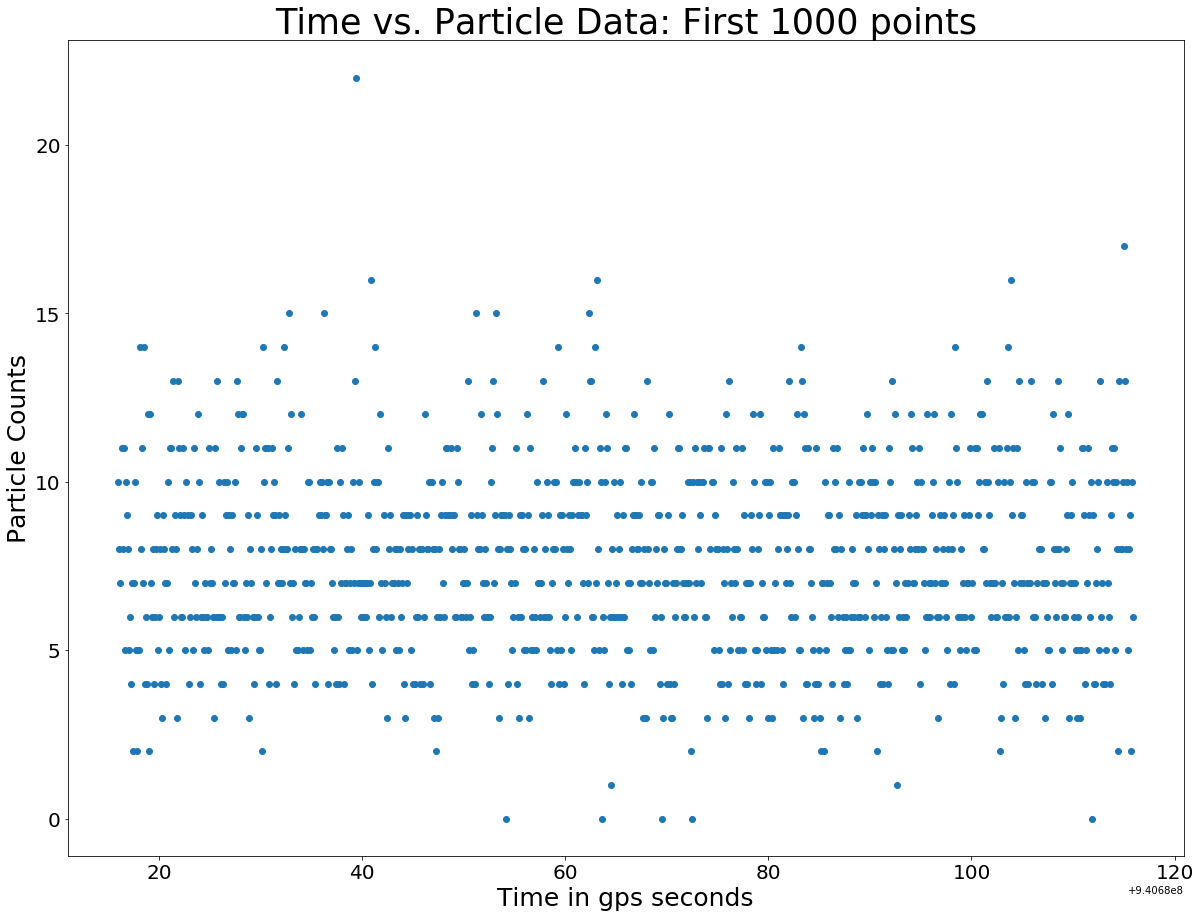

In [11]:
#-----PLOT: Time vs. Particle Counts first 1000 points ----
#Specifies total number of data points to be plotted from background data
totalPoints = 1000

#Specifies starting point of dadtapoints
startPoint = 0

#Specifies the ending point
endPoint = totalPoints - startPoint

#Create data column array
t = data[0, :]

#take first set # of elements for time array
t = t[startPoint:endPoint]

#Create data column array 
particle = data[3,:]


particle = particle[startPoint:endPoint]


#Plot a scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(t, particle)

#Style plot
#ax.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Time in gps seconds', size = 25)
ax.set_ylabel('Particle Counts', size = 25)
ax.set_title('Time vs. Particle Data: First 1000 points', size = 35)
plt.show()

By looking at the relationship between the time and particle data of the first 1000 points we don't see any clear relationship from this scatter plot. Next we will test out the relationship between Solar phase and particle counts.

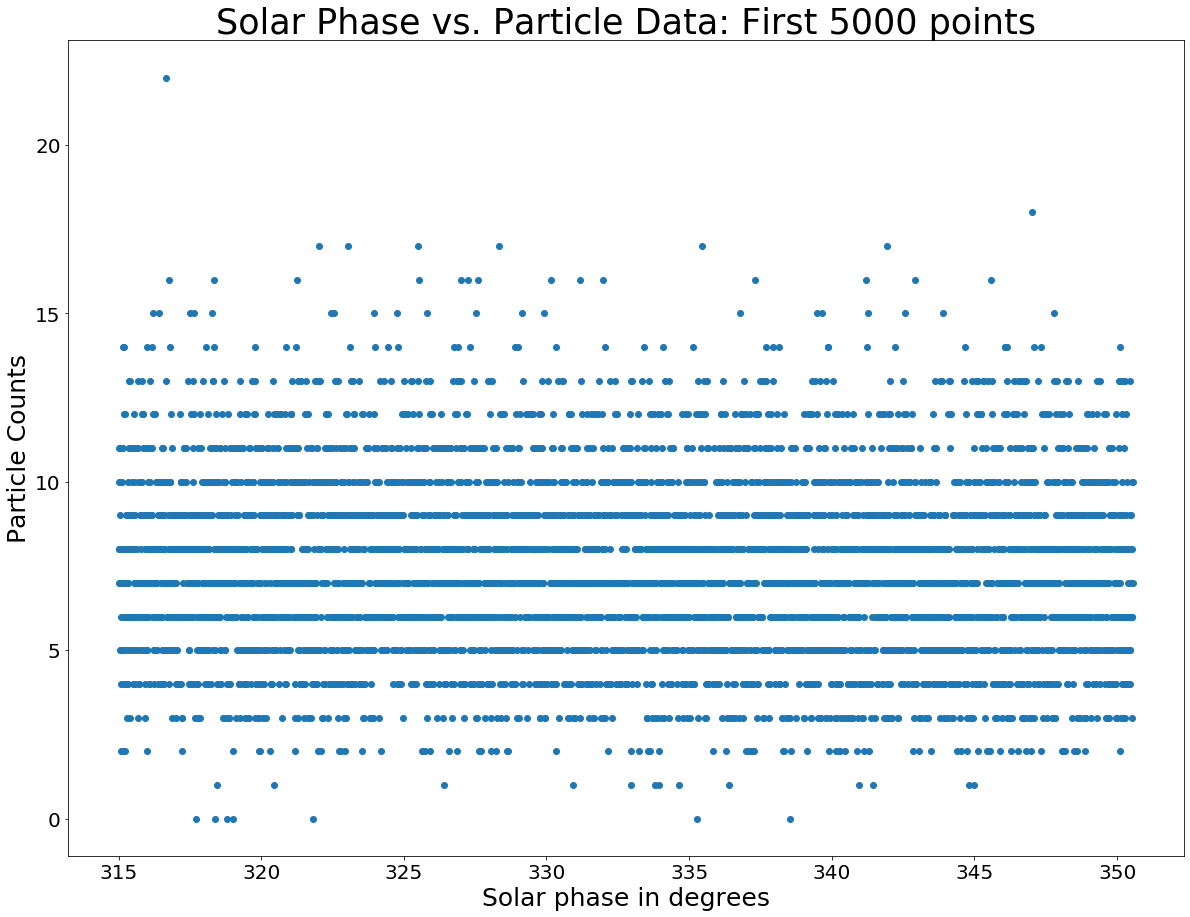

In [19]:
#-----PLOT: Solar Phase vs. Particle Counts first 5000 points ----
#Specifies total number of data points to be plotted from background data
totalPoints = 5000

#Specifies starting point of dadtapoints
startPoint = 0

#Specifies the ending point
endPoint = totalPoints - startPoint

#Create solar column array
solar = data[1, :]

#take first set # of elements for time array
solar = solar[startPoint:endPoint]

#Create data column array 
particle = data[3,:]


particle = particle[startPoint:endPoint]


#Plot a scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(solar, particle)

#Style plot
#ax.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Solar phase in degrees', size = 25)
ax.set_ylabel('Particle Counts', size = 25)
ax.set_title('Solar Phase vs. Particle Data: First 5000 points', size = 35)
plt.show()

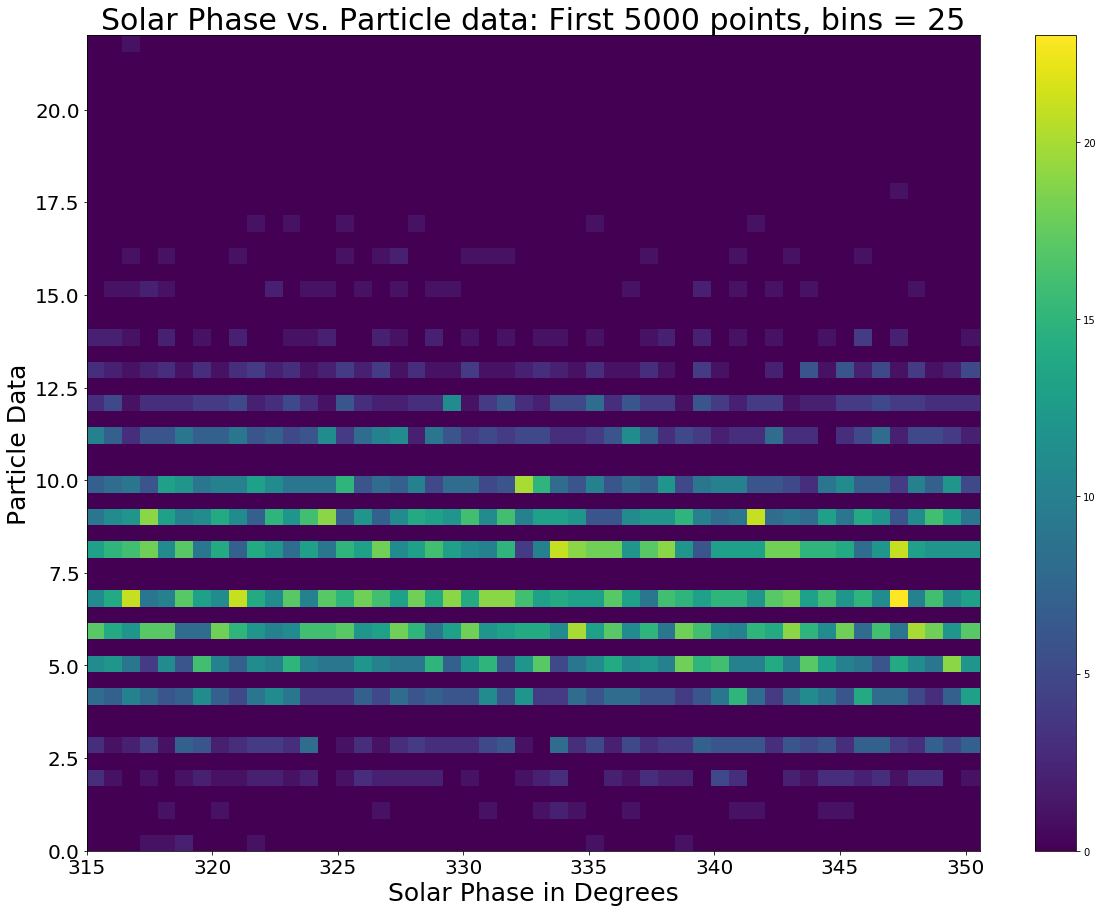

In [24]:
#-----Density plot of solar phase vs. particle data: First 5000 points, Bins = 50-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(solar, particle, bins = 50)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Solar Phase in Degrees', size = 25)
ax.set_ylabel('Particle Data', size = 25)
ax.set_title('Solar Phase vs. Particle data: First 5000 points, bins = 25', size = 30)
plt.colorbar(h[3], ax=ax)
plt.show()

By looking at both the scatter plot and the 2-d histogram plot, we still don't see any clear relationship between solar phase and the particle data. Next we explore the Earth longitude data vs. the particle data.

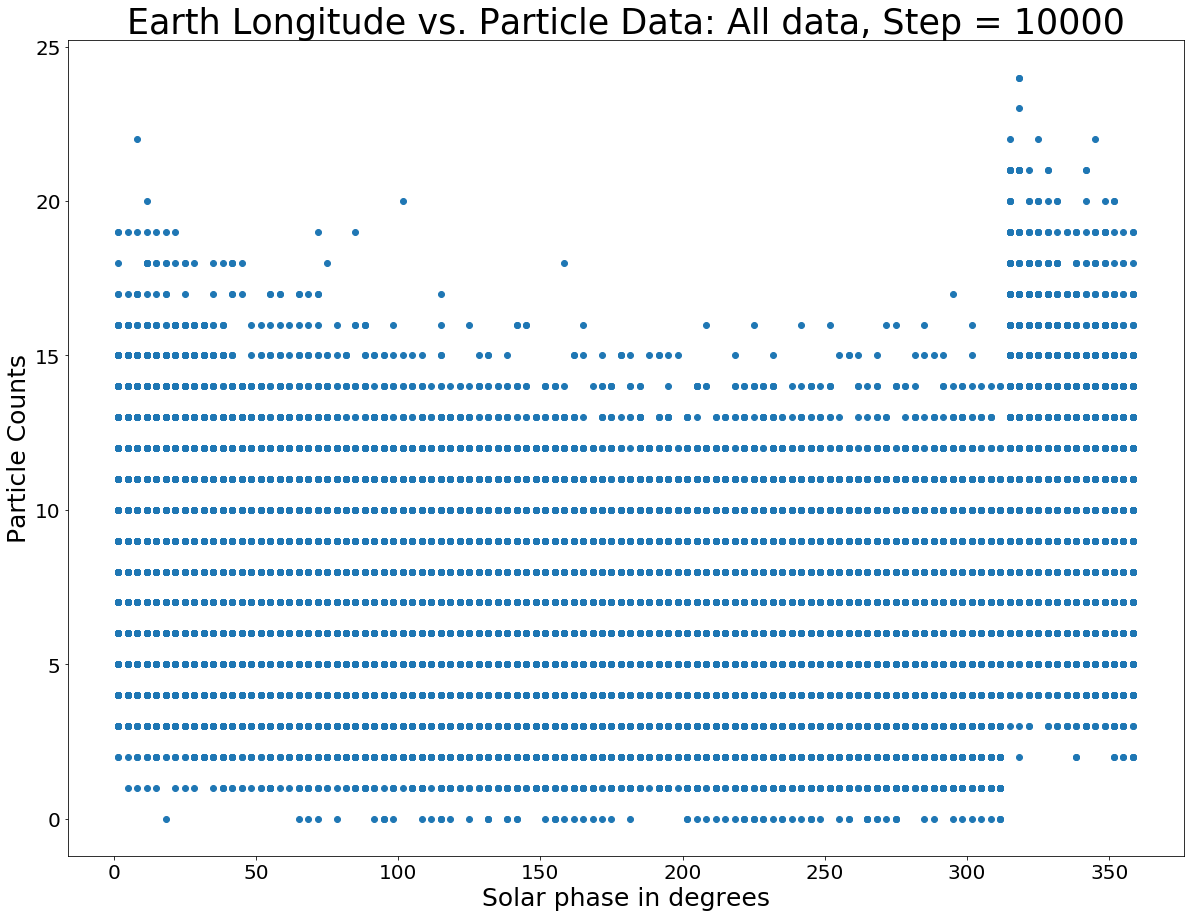

In [25]:
#step through data to find pattern
#use numpy sclicing (start:stop:step)
#define the step
step = 500

#Specifies total number of data points to be plotted from background data
totalPoints = len(data[1, :])

#Specifies starting point of dadtapoints
start = 0

#Specifies the ending point
end = totalPoints - startPoint

#Create solar column array
earthLongitude = data[2, :]

#take first set # of elements for time array
earthLongitude = earthLongitude[start:end:step]

#Create data column array 
particle = data[3,:]

particle = particle[start:end:step]

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(earthLongitude, particle)

#Style plot
#ax.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Solar phase in degrees', size = 25)
ax.set_ylabel('Particle Counts', size = 25)
ax.set_title('Earth Longitude vs. Particle Data: All data, Step = 10000', size = 35)
plt.show()

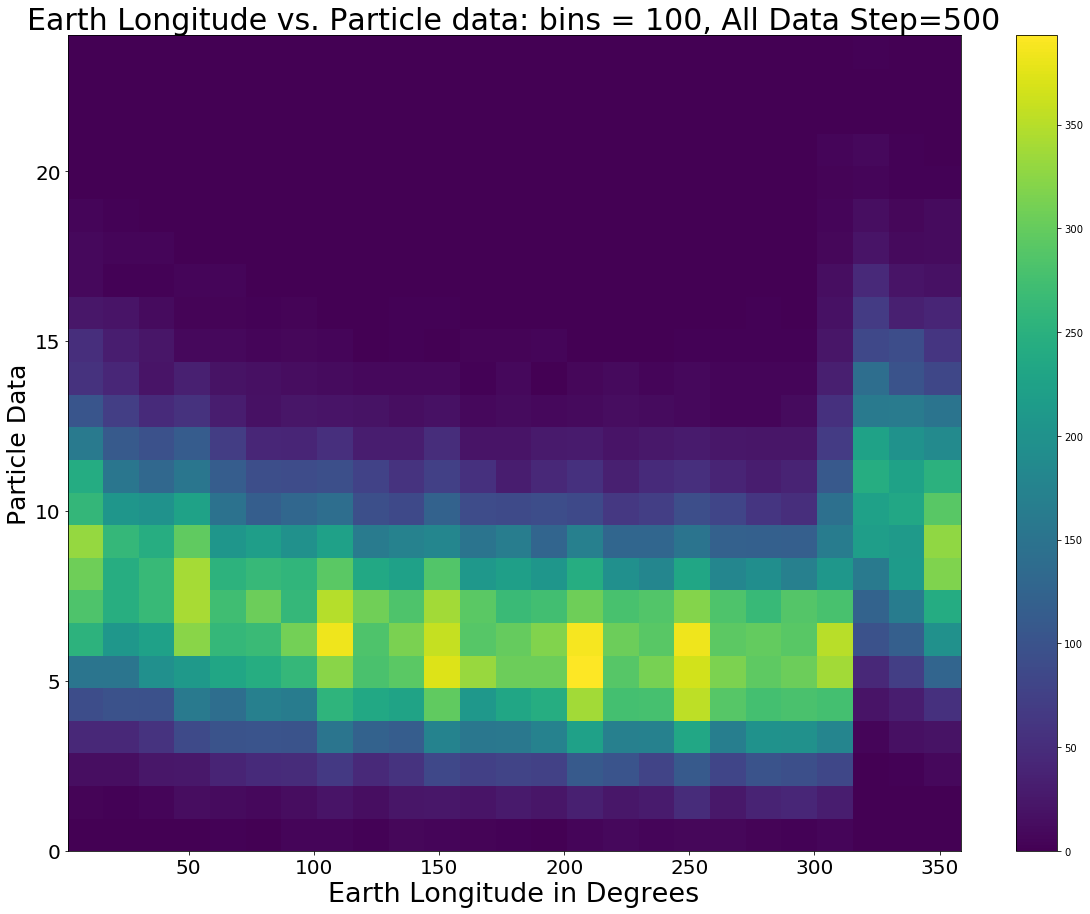

In [27]:
#-----Density Plot of Earth longitude vs. particle data: Bins = 25-----

#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(earthLongitude, particle, bins = 25)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Earth Longitude in Degrees', size = 27)
ax.set_ylabel('Particle Data', size = 25)
ax.set_title('Earth Longitude vs. Particle data: bins = 100, All Data Step=500', size = 30)
plt.colorbar(h[3], ax=ax)
plt.show()

Finaly! In the plot above we can see a clear relationship between the earth longitude in degrees and the particle data. Because we know that the satelite is taking data over a period of time, we know that the earth longitude is changing in relationship to the satelite over a period. This means that the particle data is also changing periodically as the satelite moves and the earth longitude changes. Notice how there is a jump (discontinuity) in the data at about 325 earth longitude in degrees. This probabily means that this is where the cycle of one period is coming to an end, and starting a new period. 

This means we need to look at plots relating the folded time axis over one period of the particle data. We know the period is 90 min, so to calculate one period in seconds: 90 min * 60 sec/min = 5400 seconds. Note that we have to align the time axis so we are plotting the relationship starting at the beginning of the period, and plotting all the data over one folded time axis over the period. 

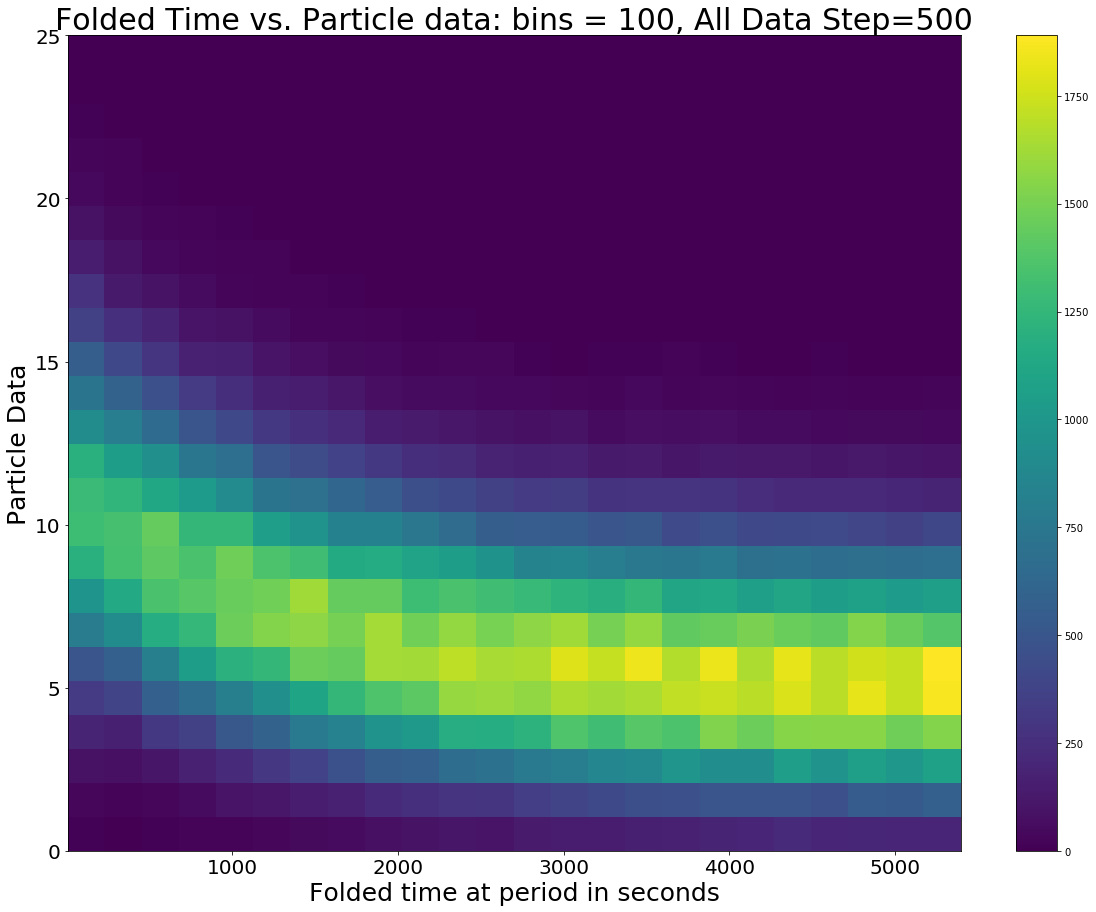

In [37]:
#FOLDED TIME AXIS PLOTS


#step through data to find pattern
#use numpy sclicing (start:stop:step)
#define the step
step = 100

#Specifies total number of data points to be plotted from background data
totalPoints = len(data[1, :])

#Specifies starting point of dadtapoints
start = 0

#Specifies the ending point
end = totalPoints - startPoint

#Create solar column array
time = data[0, :]

#take first set # of elements for time array
time = (time[start:end:step] - 4050) % 5400


#Create data column array 
particle = data[3,:]

particle = particle[start:end:step]

#-----Density: Bins = 25-----
#define time as hours so the repettitive neww stands out and you get intrevals 
#Plot a scatter plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(time, particle, bins = 24)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Folded time at period in seconds', size = 25)
ax.set_ylabel('Particle Data', size = 25)
ax.set_title('Folded Time vs. Particle data: bins = 100, All Data Step=500', size = 30)
#plt.xlim([4100, 9700])
plt.colorbar(h[3], ax=ax)
plt.show()

In the graph above (Folded time vs. Particle data) we see a clear trend in the particle data. Knowing from the problem statement that the particle data consists mostly of background cosmic rays, we believe this trend (seen in the yellow downward sloping line) is caused by the background noise which is the signal contamination. 

Finding the mean of the particle data, which is the mean of the cosmic ray background contamination signal, helps us define a background pdf() that will fit the distribution we found. From previous home work and lab problems, additionally knowing what gamma distributions look like, we will first try to fit our background pdf to a gamma distruibution. 


#### 2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

Because the background data repeats in a period, we need to sort the data to create a graph of all data points and find a pdf that represents the data.

In [38]:
#particle = particle with steps of 500
sortedParticle = np.sort(particle)

particleMean = np.mean(sortedParticle)

print('max value in sorted particle data =', max(sortedParticle))

#Find fit parameters 
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(sortedParticle)

print('Find Fit Parameters:')
print('    alpha = ', fit_alpha)
print('    loc = ', fit_loc)
print('    scale = ', fit_beta)

max value in sorted particle data = 25.0
Find Fit Parameters:
    alpha =  10.57393069842126
    loc =  -2.7393185309938946
    scale =  0.9304078074487563


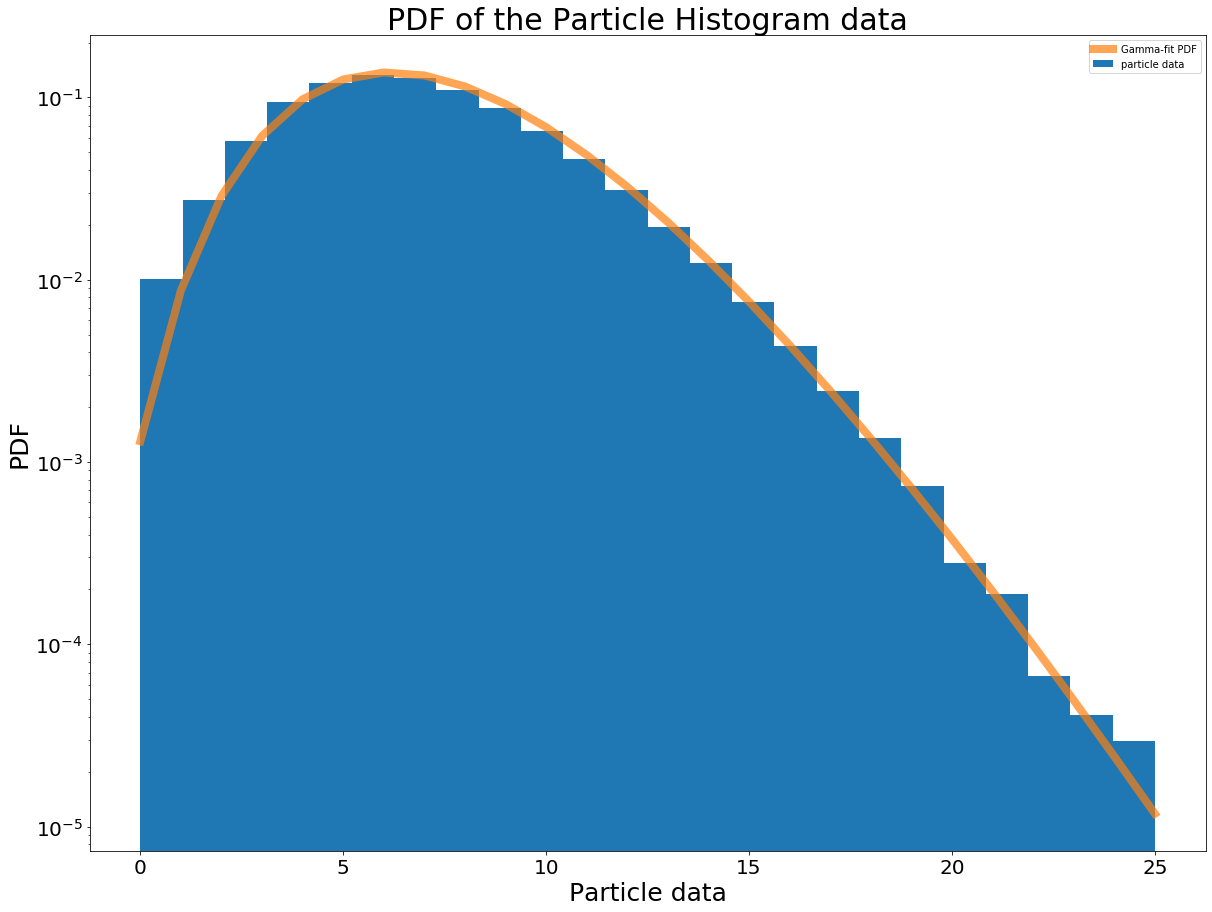

mean of particle data =  7.098749619021532


In [43]:
#-----Plot data and PDF------
#Histogram with Probability Density function
fig, ax = plt.subplots(1, 1)
plt.yscale('log')
ax.hist(sortedParticle,24, density=True, label='particle data')

plt.tick_params(labelsize = 20)

gammaFitPDF = stats.gamma.pdf(sortedParticle, a = fit_alpha, loc = fit_loc, scale = fit_beta)
ax.plot(sortedParticle,gammaFitPDF,linewidth = 8,alpha = 0.7, label='Gamma-fit PDF')

#Setting plot title and lables
ax.set_xlabel('Particle data', size = 25)
ax.set_ylabel('PDF', size = 25)
ax.set_title('PDF of the Particle Histogram data', size = 30)
plt.legend(loc="best")
plt.show()

meanParticle = np.mean(particle)

print('mean of particle data = ', meanParticle)

Because the particle data is a discrete dataset, so it will follow a discrete pdf distribution. 

By taking ever 500th value from our particle dataset, we are able to have a sample size that is small enough to easily work with but large enough to accurately represent all the data in the particle data set. 

Sorting our data before plotting, we are able to look at the data on a folded  axis. This means we are looking at the particle data over a period. This allows to find the background trend over the period of the satelite orbit. 

After trying different fits, we found that our data follows a gamma-fit distribution best. The orange line represents the PDF of a gamma-fit, and the blue histogram is the data from our particle data. We fit the gamma pdf to our background data, and set the number of bins equal to the largest number in the particle dataset (24) so it makes a bin for each number of particle counts.

The background is **not consistent** because it repeats in a periodic pattern across the dataset. It repeats every orbit of the satelite. This means **the background changes based on the period of the satelite.**


#### 3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

In [45]:
#Defining folded time axis
timeGpsFold = (data[0,::100] - 3900)%5200

#Defining model background data
backgroundData = np.sort(stats.poisson.rvs(loc = 0, mu = meanParticle, size = len(timeGpsFold)))


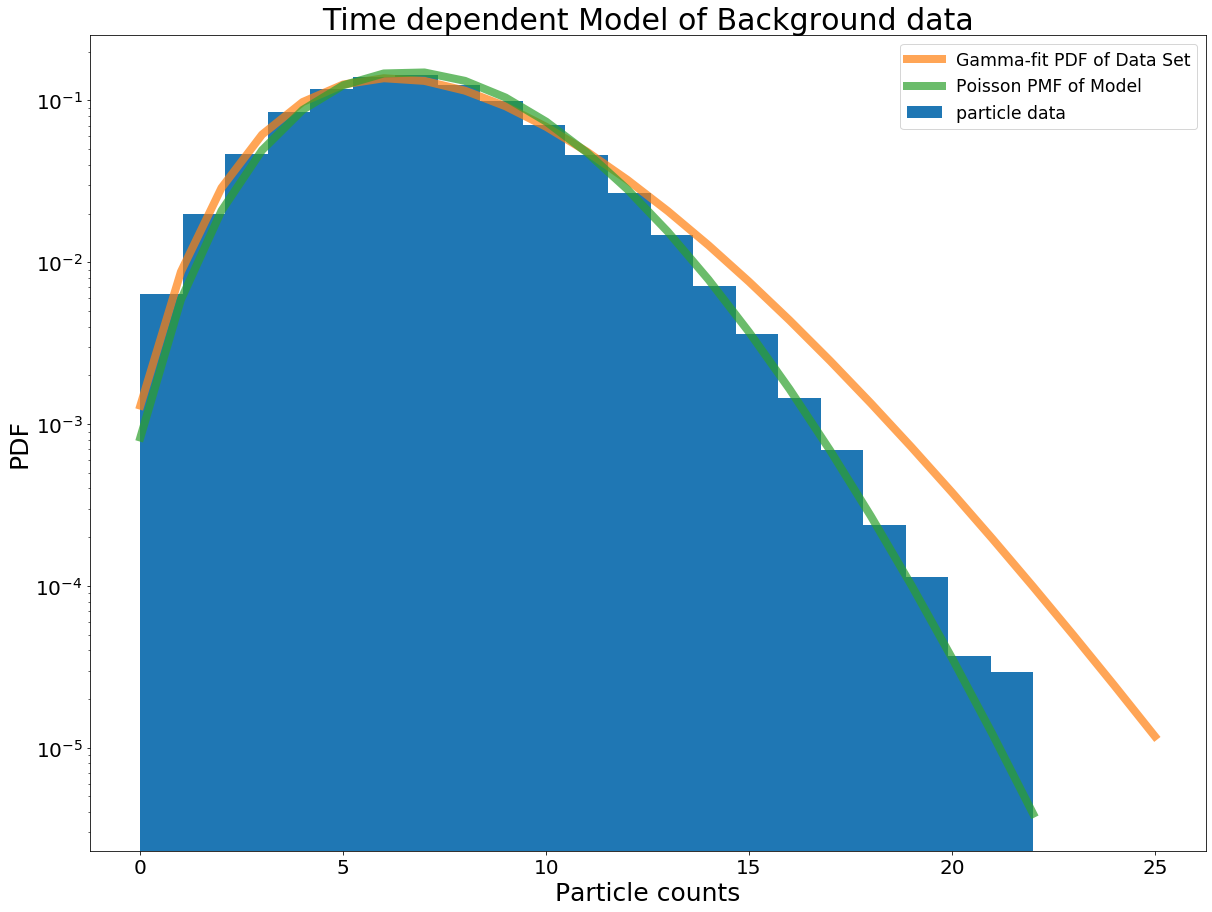

In [52]:
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

ax.hist(backgroundData,21, density=True, label='particle data')



gammaFitPDF = stats.gamma.pdf(sortedParticle, a = fit_alpha, loc = fit_loc, scale = fit_beta)
ax.plot(sortedParticle,gammaFitPDF,linewidth = 8,alpha = 0.7, label='Gamma-fit PDF of Data Set')

poissonPMF = stats.poisson.pmf(backgroundData, loc = 0, mu = meanParticle)

ax.plot(backgroundData, poissonPMF, linewidth = 8,alpha = 0.7, label='Poisson PMF of Model')

#Setting plot title and lables
plt.tick_params(labelsize = 20)
ax.set_xlabel('Particle counts', size = 25)
ax.set_ylabel('PDF', size = 25)
ax.set_title('Time dependent Model of Background data', size = 30)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

Because gamma measurements are only discrete integer values, we used a discrete poisson distribution to model our background data over one period of 90 min. 

Using fit paramters from our partical data set, we were able to create a poisson distribution of data that closely approximates the distribution of our data. Here our expected value is 7, which is the average number of particle counts.

The green line is the poisson PMF of the model poisson data over one period. The orange line is the gamma PDF fit of the actuall particle data from the given dataset. By compairing these probability distribution lines, we can see that our model very closley approximates the probability distribution of our background data over one period. 

#### 4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

Because the background distribution data varies with time, the 5-sigma detection vallues will also change with time. 

A 5-sigma detection will require more particle counts at the beginning of an orbit as comapired to in the middle of the probability distributions

First we will find the probability of getting 5 sigma detection for a standard normal distribution. Next we will plut this probability into the poisson distribution of variates so that each distribution corresponds to a range of values for 1 millisecond of time at different intervals.

In [72]:
#Find probability coresponding to 5-sigma
sigma = 5
prob5 = stats.norm.sf(sigma, loc=0, scale=1)
print('probability coresponding to 5-sigma:', prob5)

print()

# Plug that probability into the poisson distribution of variates 
#such that each distribution corresponds to a 
#range of values for 1 millisecond of time at different intervals
threshold = stats.gamma.ppf(1-prob5, a = fit_alpha, loc = fit_loc, scale = fit_beta)
print('threshold = ', threshold)

print()
#Look at spike in probability in beginning of period
particleSpike = np.sort(particle)[:259000:-1]
print(f'{particleSpike.mean()} is the mean of the range of spike values. The nearest integer value will be set as the mu value for a Poisson PPF to determine a 5 sigma measurement value.')
print()

spike5 = stats.poisson.ppf(1-sigma5, mu=20)
print(f'{spike5} is the value needed for a 5-sigma detection in the spike area of the gamma counts')

print()
#Look at low flat spot in probability towards tail end of period
particleLow = np.sort(particle)[119800:120000:]
print(f'{particleLow.mean()} is the mean of a range of values in the area of the flattened decline of the particle count distribution. The nearest integer value will be set as the mu value for a Poisson PPF to determine a 5 sigma measurement value')

print()
low5 = stats.poisson.ppf(1-sigma5, mu=7)
print(f'{low5} is the value needed for a 5-sigma detection in the flattened, declining area of the gamma counts')


probability coresponding to 5-sigma: 2.866515718791933e-07

threshold =  30.201704274081425

20.58 is the mean of the range of spike values. The nearest integer value will be set as the mu value for a Poisson PPF to determine a 5 sigma measurement value.

46.0 is the value needed for a 5-sigma detection in the spike area of the gamma counts

7.0 is the mean of a range of values in the area of the flattened decline of the particle count distribution. The nearest integer value will be set as the mu value for a Poisson PPF to determine a 5 sigma measurement value

24.0 is the value needed for a 5-sigma detection in the flattened, declining area of the gamma counts


In the spike in the beginning of any orbit in our background particle dataset, a value of 46 particle counts is required for a 5 sigma detection.

In the flatten area in in the middle to end of every orbit, only 24 particle counts are needed for 5 sigma detection.

Notice this is a decrease by almost a factor of 2 for the gamma counts needed for a 5 sigma detection for two different intervals, the beginning of the orbit and the end of the orbit, for any orbit period. This is a significant difference.

## Problem 2

In this problem we are looking at a stack of telescope images. 

We have 10 images. I will be looking for faint stars. 

#### 1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.


Data:
- stack of 10 square images
- 200 pixels on a side --> 400 pixels in an image
- LOOK AT STACK DATA

image stack is [200,200, 10]
- Ten images corelating to 200 pixels per side

In [73]:
#Imports file
hf = h5py.File('images.h5', 'r')

#Looks at header
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [75]:
#Imports data into workable arrays
image1 = np.array(hf.get('image1'))

imagestack = np.array(hf.get('imagestack'))

#Closes file
hf.close()

#### 2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

In [76]:
#Find the size of each dimension
print('image1 shape:', image1.shape)

image1 shape: (200, 200)


In [77]:
#Find the size of each dimension
print('imagestack shape:', imagestack.shape)

imagestack shape: (200, 200, 10)


Below we will plot the data from image 1 in a scatter plot and 2d histogram.

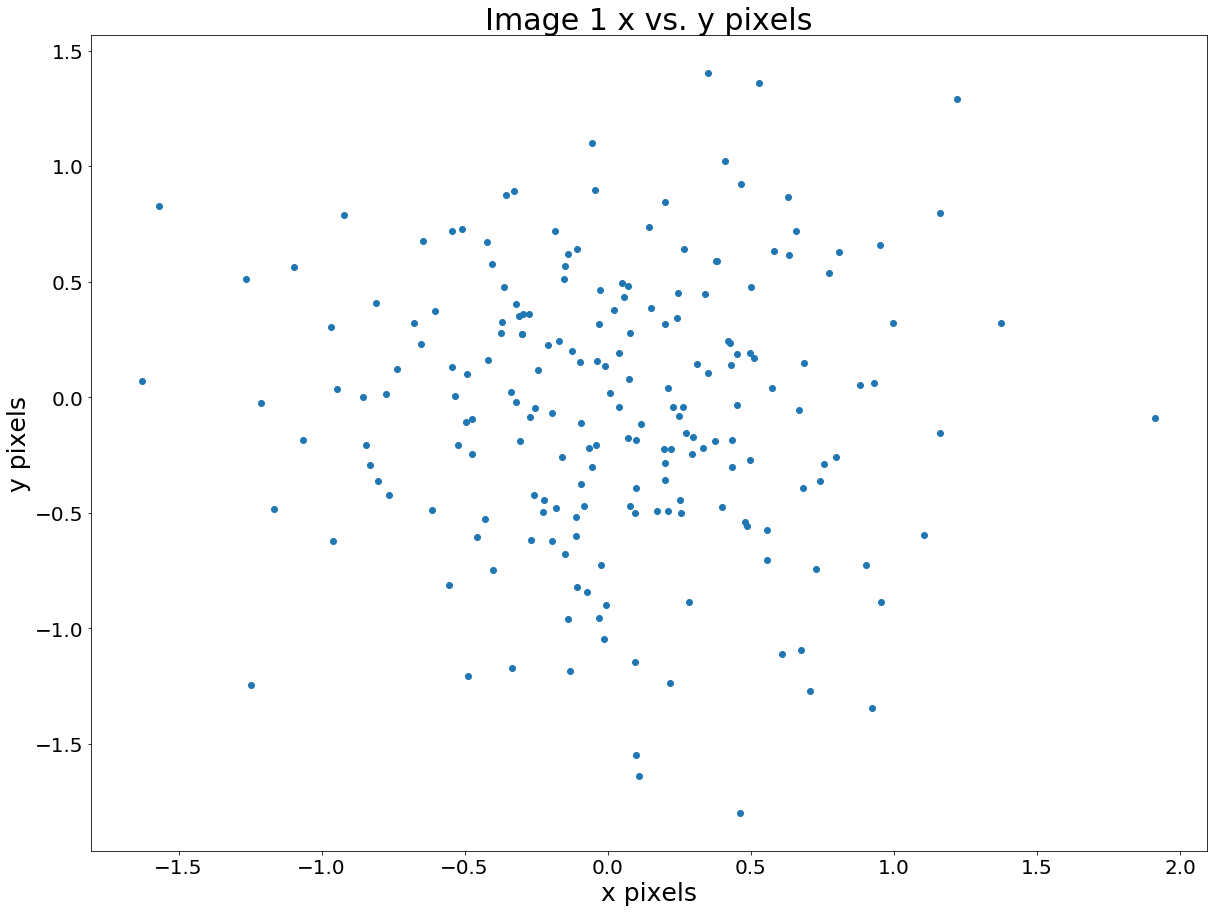

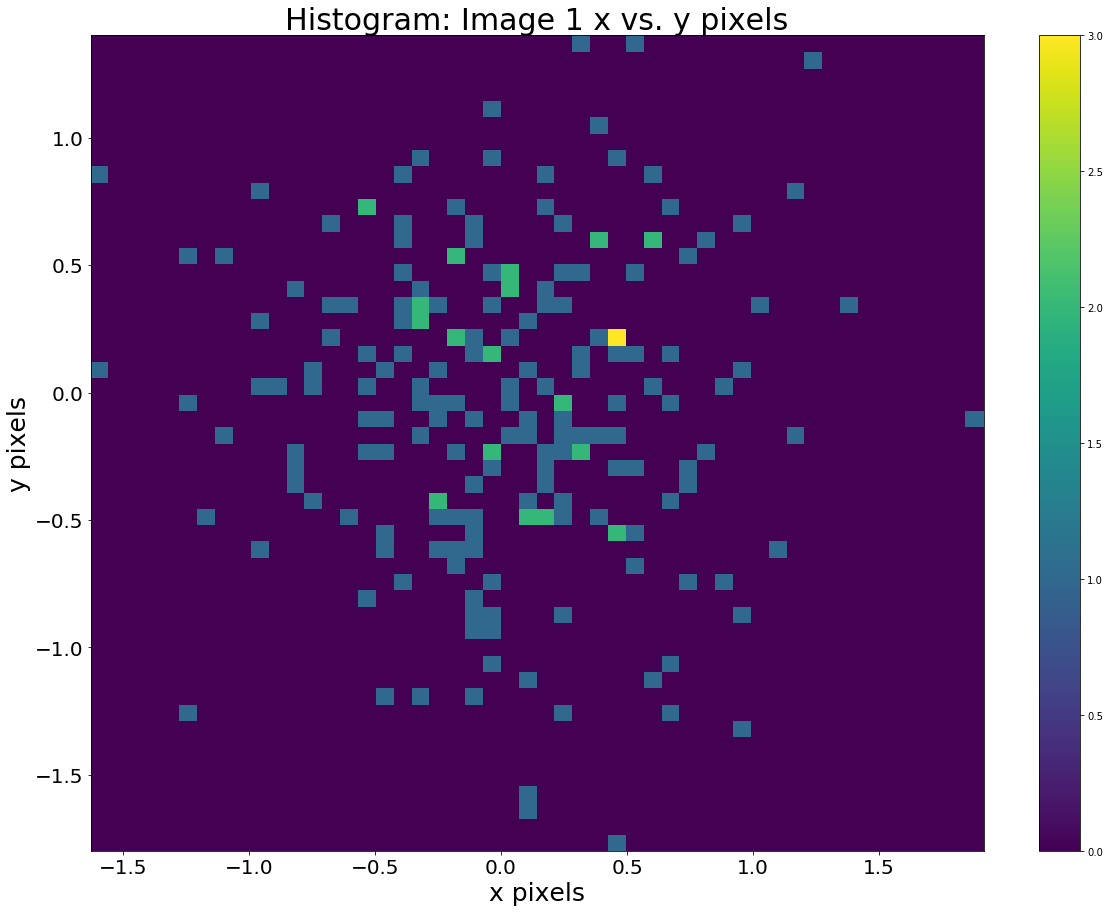

In [78]:
#Plotting image1 data (first image in stack)
image_x = image1[:,0]

image_y = image1[0,:]


#Plot a scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(image_x, image_y)
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('x pixels', size = 25)
ax.set_ylabel('y pixels', size = 25)
ax.set_title('Image 1 x vs. y pixels', size = 30)
plt.show()

#Density plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(image_x, image_y, bins = 50)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('x pixels', size = 25)
ax.set_ylabel('y pixels', size = 25)
ax.set_title('Histogram: Image 1 x vs. y pixels', size = 30)
plt.colorbar(h[3], ax=ax)
plt.show()

The graphs above are from the image1 dataset. In this data we can tell there is alot of background noise, but it is very hard to see a pattern when looking at just one image.

Below we will plot the 2-d histograms of images from the imagestack dataset. We will look at images 1, 5, and 10.

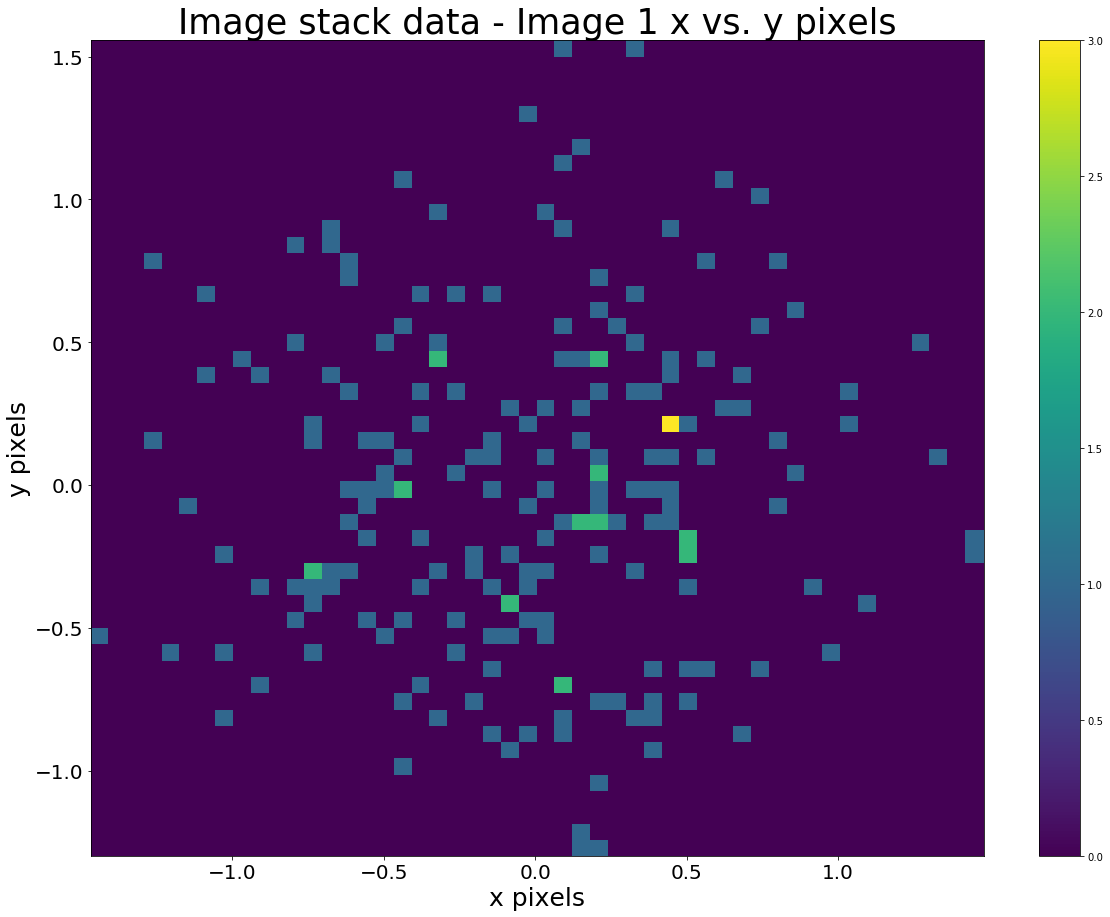

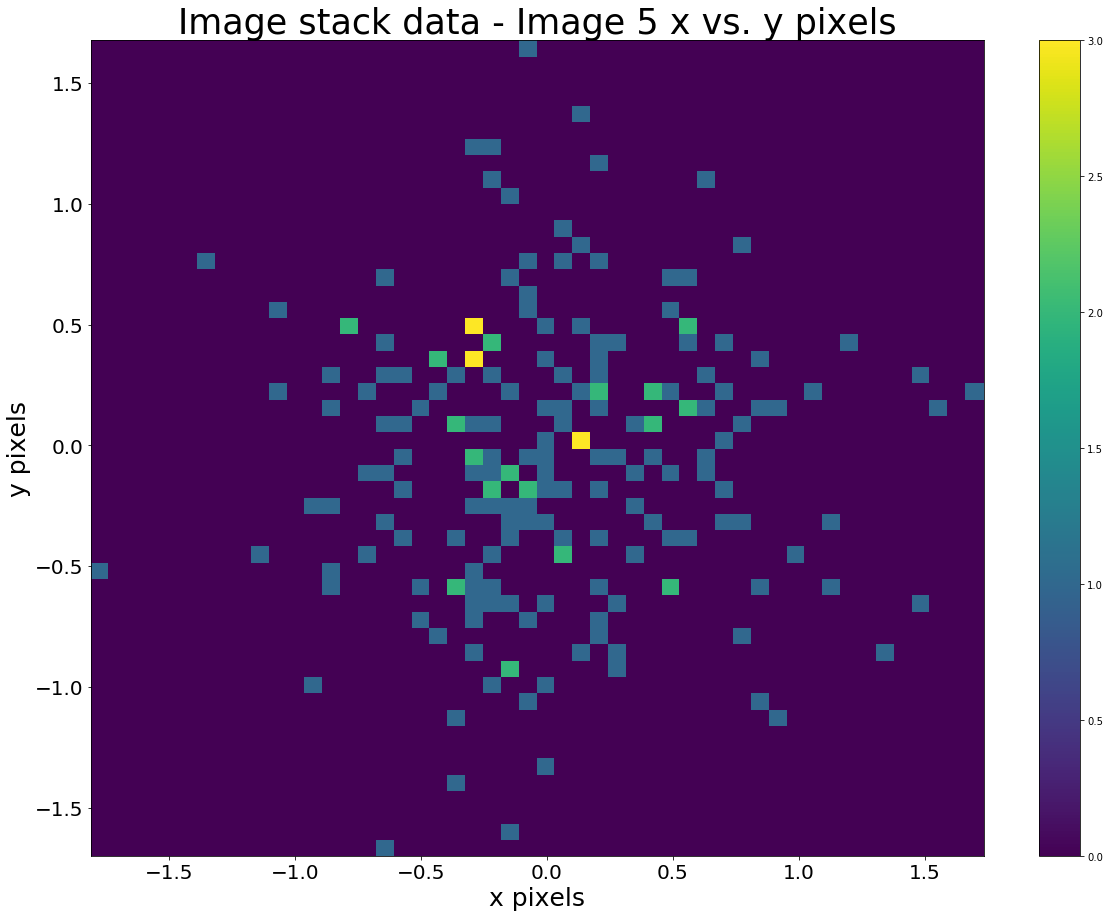

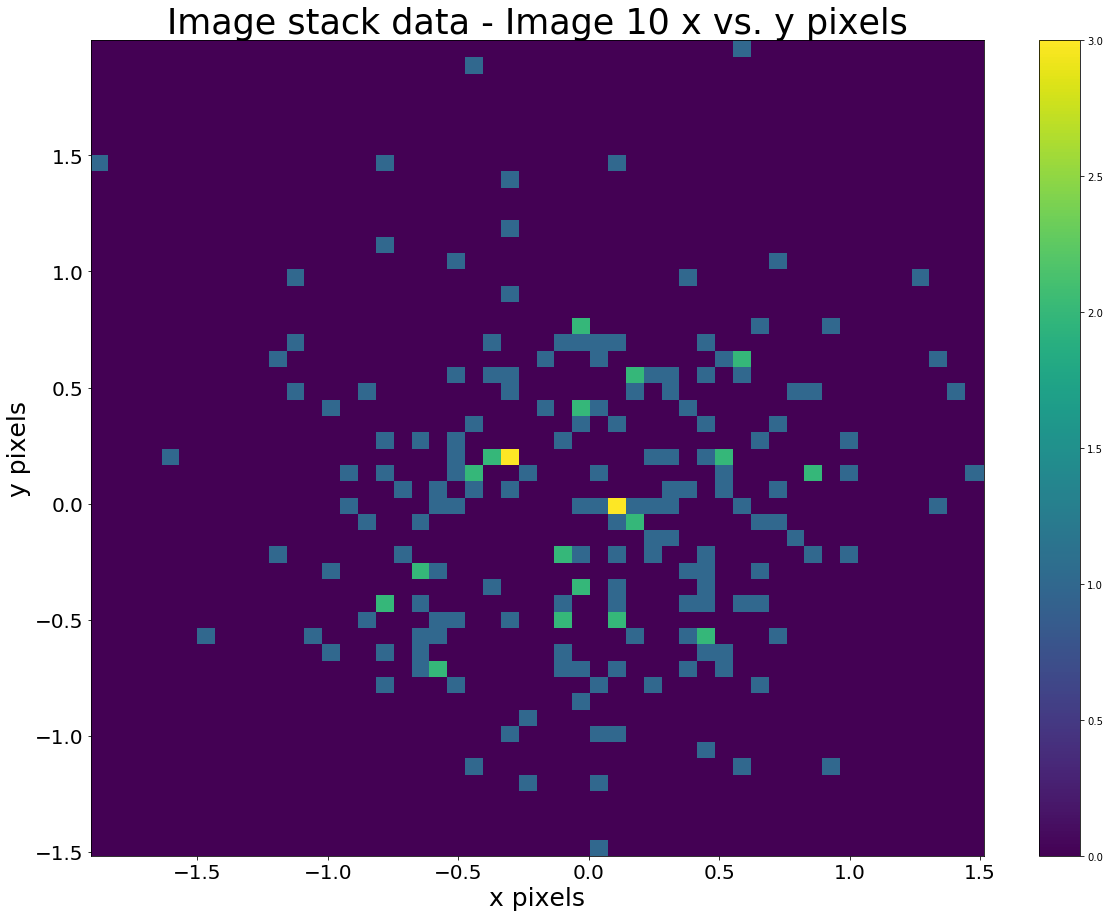

In [80]:
#PLOT  IMAGE 1
pixel_x1 = imagestack[:,0,0]

pixel_y1 = imagestack[0,:,0]
#Density Plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(pixel_x1, pixel_y1, bins = 50)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('x pixels', size = 25)
ax.set_ylabel('y pixels', size = 25)
ax.set_title('Image stack data - Image 1 x vs. y pixels', size = 35)
plt.colorbar(h[3], ax=ax)
plt.show()


#PLOT  IMAGE 5
pixel_x2 = imagestack[:,0,4]

pixel_y2 = imagestack[0,:,4]
#Density Plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(pixel_x2, pixel_y2, bins = 50)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('x pixels', size = 25)
ax.set_ylabel('y pixels', size = 25)
ax.set_title('Image stack data - Image 5 x vs. y pixels', size = 35)
plt.colorbar(h[3], ax=ax)
plt.show()


#PLOT  IMAGE 10
pixel_x = imagestack[:,0,9]

pixel_y = imagestack[0,:,9]
#Density Plot
fig, ax = plt.subplots(1,1)

h = ax.hist2d(pixel_x, pixel_y, bins = 50)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('x pixels', size = 25)
ax.set_ylabel('y pixels', size = 25)
ax.set_title('Image stack data - Image 10 x vs. y pixels', size = 35)
plt.colorbar(h[3], ax=ax)
plt.show()


Looking at individual images helps us get an overall feel of the datast, but it does not help us see a clear trend.

Next, we will sum the data of all ten images to create graphs that contain all the data points. This way we will be able to more clearly see trends, and find a background distribution of data that is in every image.

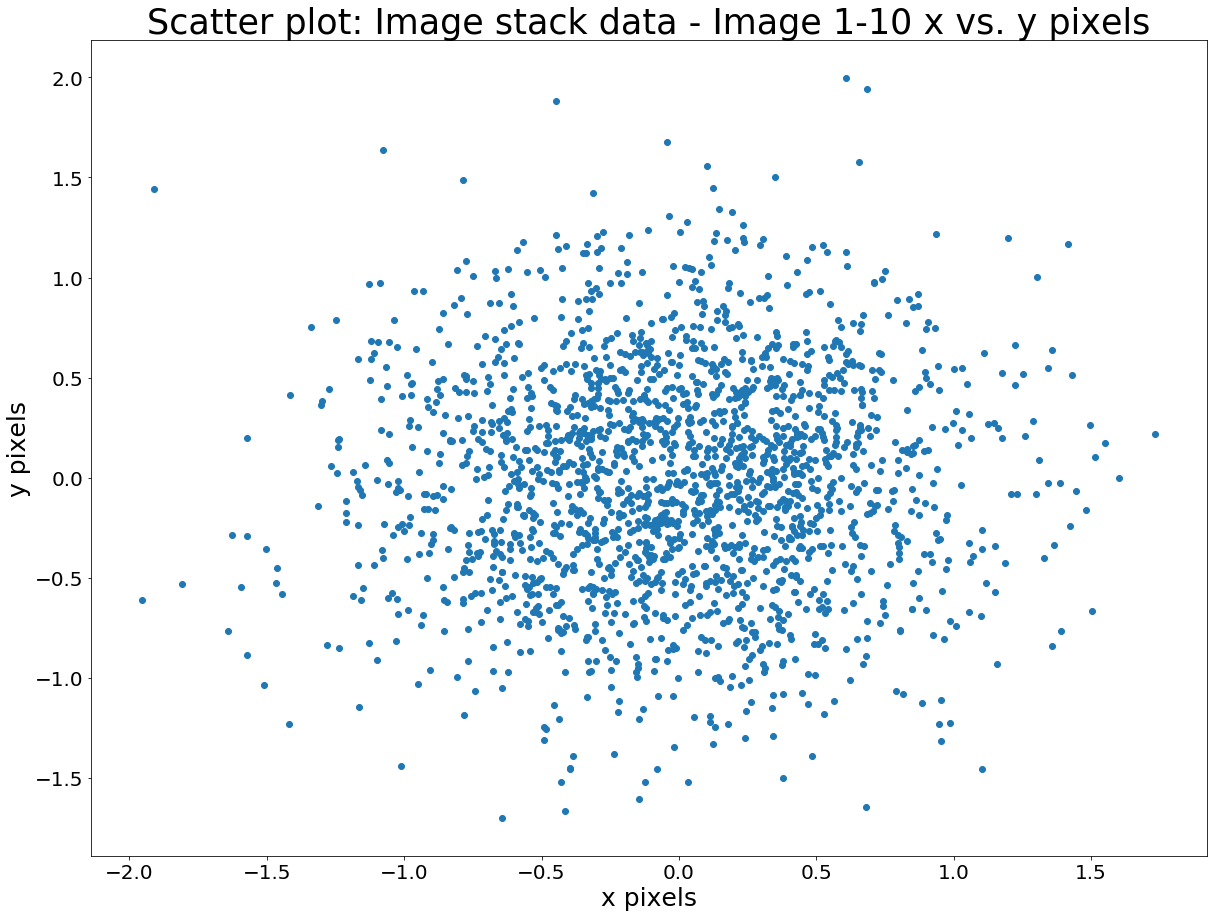

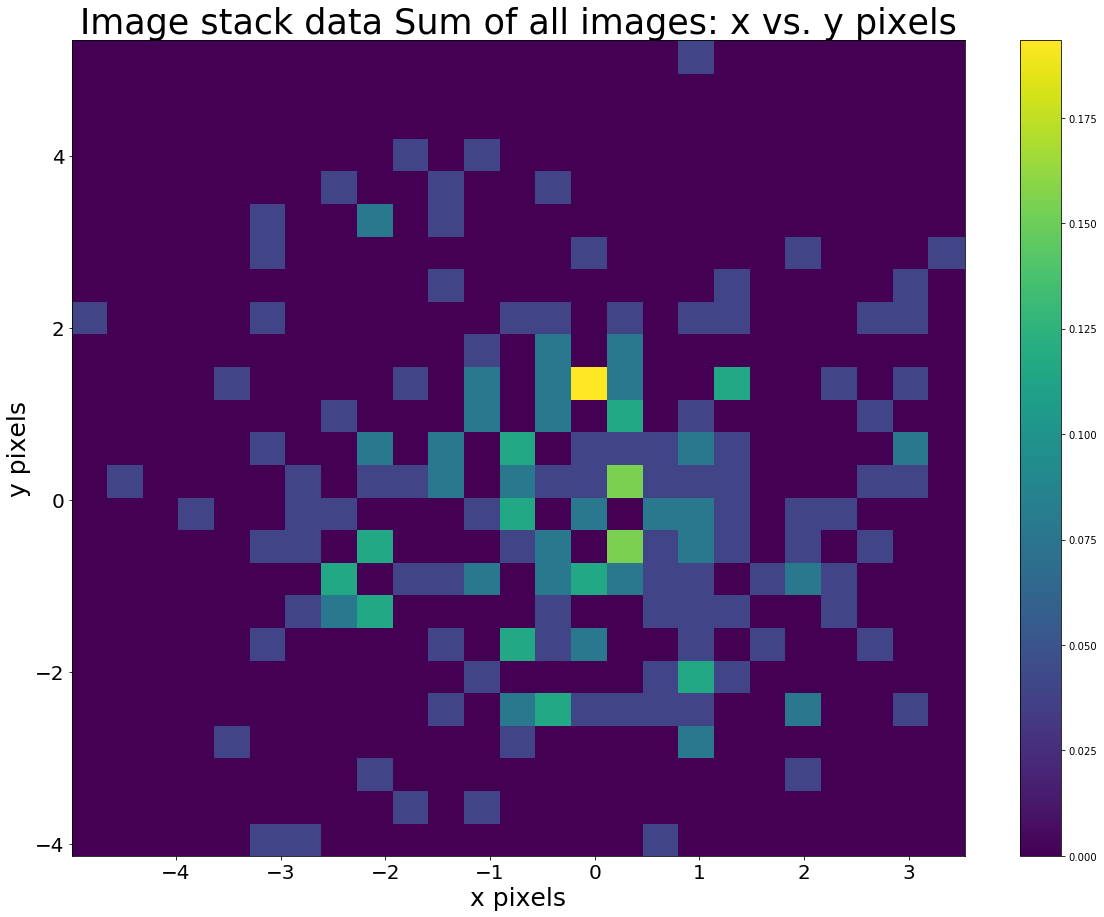

In [82]:
#Scatter plot of 10 images sum
pixel_x = imagestack[:,0,:]

pixel_y = imagestack[0,:,:]


#Scatter plot
fig, ax = plt.subplots(1,1)

ax.scatter(pixel_x, pixel_y)
#Style plot
#ax.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('x pixels', size = 25)
ax.set_ylabel('y pixels', size = 25)
ax.set_title('Scatter plot: Image stack data - Image 1-10 x vs. y pixels', size = 35)
plt.show()





#Density plot of 10 Images sum
sumPixel_x = 0
sumPixel_y = 0

for i in range(9):
    sumPixel_x = sumPixel_x + imagestack[:,0,i]
    sumPixel_y = sumPixel_y + imagestack[0,:,i]
    

#----Plot sum of images 1-10 all image 2-d hisogram ------

#Density Plot
fig, ax = plt.subplots(1,1)

#density = ture??
h = ax.hist2d(sumPixel_x, sumPixel_y, bins = 25, density = True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('x pixels', size = 25)
ax.set_ylabel('y pixels', size = 25)
ax.set_title('Image stack data Sum of all images: x vs. y pixels', size = 35)
plt.colorbar(h[3], ax=ax)
plt.show()


Because we have no information about how the telescope is operating, how the time differences in when the images were taken, we can not say for sure that the background is time dependent. However it is clear that that the data is shifting in position from image to image, so it is not consisten spatially. 

From our plot of the image stack data sum of all ten images, we have a good idea how the signal is distributed in all the images overall. 

To calculate our background pdf(), we will first create a histogram of the intensities of each pixel. This will allow us to find a pdf of the background distribution of the signal contamination from the bright stars. 

To find the intensity of each pixel, we will calculate the amplitude (magnitude) of each pixel using: $X\hat{i} + Y\hat{j}$ is $|\vec{XY}| = \sqrt{X^2 + Y^2}$

#### 3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.

First we will caluclate our background pdf(). 

In [84]:
#Define amplitude function
def amplitude(x,y):
    result = np.sqrt(x**2+y**2)
    return result

In [85]:
#Find amplitude of each pixel 
amp = np.sort(amplitude(sumPixel_x,sumPixel_y))

ampMean = np.mean(amp)
# ampStd = np.sqrt(np.var(amp))


#Find fit parameters 
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(amp)

print('Find Fit Parameters:')
print('    alpha = ', fit_alpha)
print('    loc = ', fit_loc)
print('    scale = ', fit_beta)

Find Fit Parameters:
    alpha =  2.9344627524911706
    loc =  0.03500824159182596
    scale =  0.7126967907637409


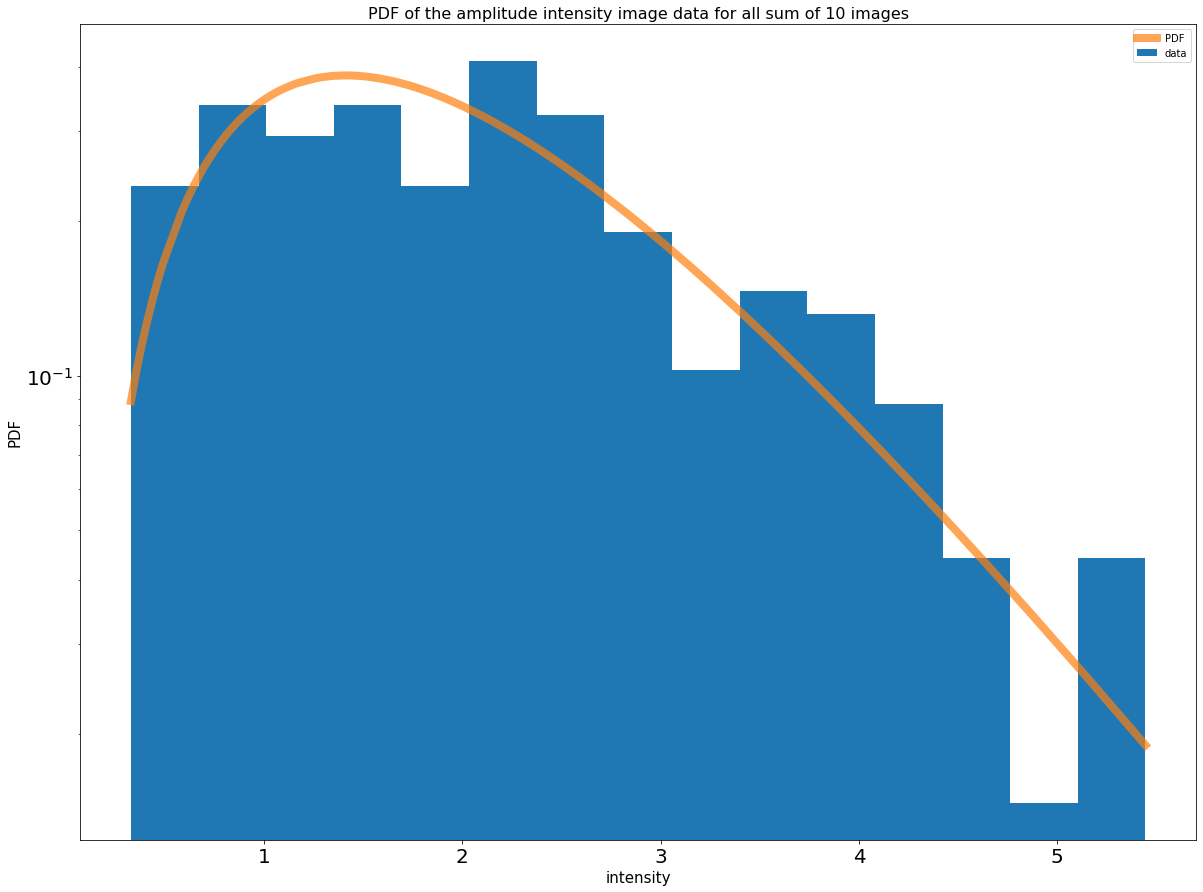

In [90]:
#-----Plot Amplitude------
#Histogram with Probability Density function
fig, ax = plt.subplots(1, 1)
plt.yscale('log')
ax.hist(amp,bins = 15, density=True, label='data')

plt.tick_params(labelsize = 20)

ax.plot(amp,stats.gamma.pdf(amp, a = fit_alpha, loc = fit_loc, scale = fit_beta),linewidth = 8,alpha = 0.7, label='PDF')

#Setting plot title and lables
ax.set_xlabel('intensity', size = 15)
ax.set_ylabel('PDF', size = 15)
ax.set_title('PDF of the amplitude intensity image data for all sum of 10 images', size = 16)
plt.legend()
plt.show()

The graph above is the histogram and probability distribution of all intensities from that sum of all all 10 images data set. 

However because we are searching for faint stars, the background signal contamination is coming from the brighter stars. We will define the background data distribution as all the brighter star intensities from one standard deviation to the left of averaged intensity distributionsfrom all the images. 

In [93]:
ampStd = np.std(amp)
backgroundAmp = []

for i in range(len(amp)):
    
    if amp[i] > (ampMean - ampStd):
        backgroundAmp.append(amp[i])

print('mean amplitude minus one standard deviation =', (ampMean - ampStd))

mean amplitude minus one standard deviation = 0.9773847722437796


Find Fit Parameters:
    alpha =  1.8542208240951679
    loc =  0.9517777161210688
    scale =  0.8154562495550146


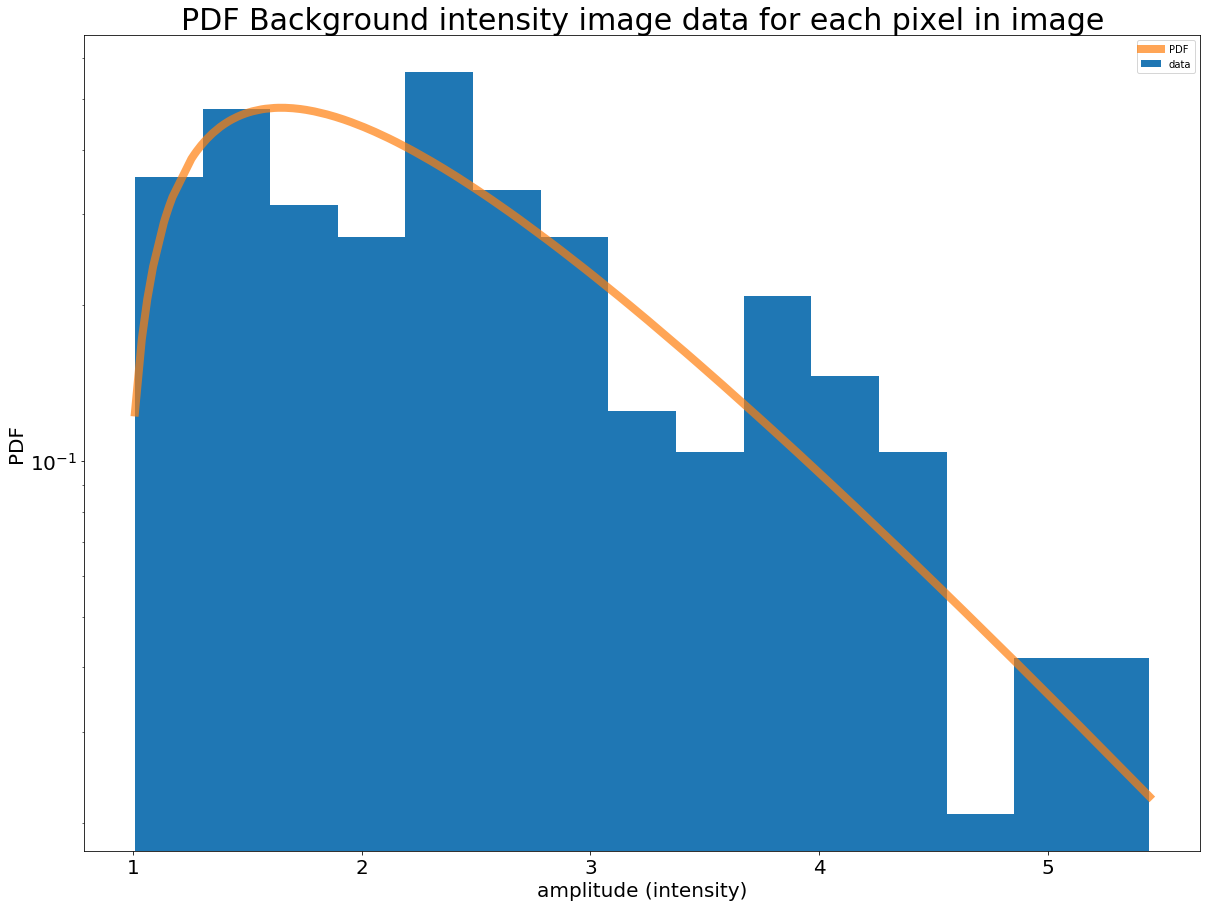

In [95]:
#Find fit parameters 
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(backgroundAmp)

print('Find Fit Parameters:')
print('    alpha = ', fit_alpha)
print('    loc = ', fit_loc)
print('    scale = ', fit_beta)


#-----Plot Amplitude------
#Histogram with Probability Density function
fig, ax = plt.subplots(1, 1)
plt.yscale('log')
ax.hist(backgroundAmp,bins = 15, density=True, label='data')

plt.tick_params(labelsize = 20)

ax.plot(backgroundAmp,stats.gamma.pdf(backgroundAmp, a = fit_alpha, loc = fit_loc, scale = fit_beta),linewidth = 8,alpha = 0.7, label='PDF')

#Setting plot title and lables
ax.set_xlabel('amplitude (intensity)', size = 20)
ax.set_ylabel('PDF', size = 20)
ax.set_title('PDF Background intensity image data for each pixel in image', size = 30)
plt.legend()
plt.show()

To search for a fainter star, we need to find the 5 sigma probability value. 
Any threshold lower than this value will be likely desired signal from my faint star, and will have a very low probability that the desired signal is actually a  signal caused by the background distrubtion.

Below we find a  5-sigma threshold value:

In [97]:
#Find probability coresponding to 5-sigma
sigma = 5
prob5 = stats.norm.sf(sigma, loc=0, scale=1)
print('probability coresponding to 5-sigma:', prob5)

#Find 5-sigma threshold value for all time
threshold = stats.gamma.ppf(prob5, a = fit_alpha, loc = fit_loc, scale = fit_beta)
print('Background signal intensity 5-sigma threshold =', threshold)

probability coresponding to 5-sigma: 2.866515718791933e-07
Background signal intensity 5-sigma threshold = 0.9521048983026443


Therefore to search for the faint stars we need look for an intensity value of less than 0.95 in each pixel.

Below we will create a clean 2d histogram plot of all the amplitude data points of an intensity less than the threshold of 0.95. This should show us the general locations of the fain stars.

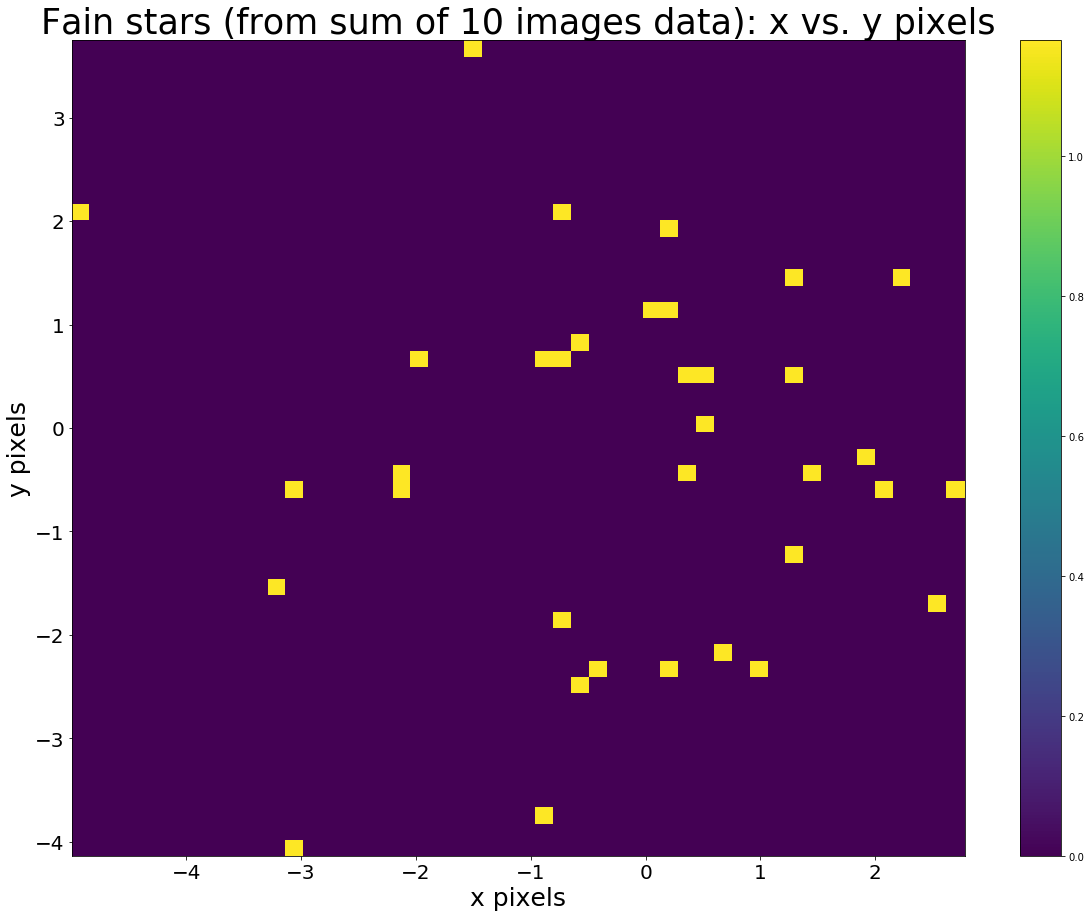

In [102]:
#Cleaning ampllitude (intensity) data to plot
cleanPix_x = []
cleanPix_y = []

for i in range(len(amp)):
    
    if amp[i] <= threshold:
        cleanPix_x.append(sumPixel_x[i])
        cleanPix_y.append(sumPixel_y[i])
        
cleanPix_x
cleanPix_y
#----Plot sum of images 1-10 all image 2-d hisogram CLEAN ------

#Density Plot
fig, ax = plt.subplots(1,1)

#density = ture??
h = ax.hist2d(cleanPix_x, cleanPix_y, bins = 50, density = True)

#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('x pixels', size = 25)
ax.set_ylabel('y pixels', size = 25)
ax.set_title('Fain stars (from sum of 10 images data): x vs. y pixels', size = 35)
plt.colorbar(h[3], ax=ax)
plt.show()

In the graph above we can see that there are quite a few different points that are counted as faint stars. Note that this distribution would be different had I defined my background data distribution differently, for example if I had chosen to make the threshold for looking for faint stars lower I probably would have found less points. It all depends on what you consider as the faintest. 

This image represents the general area that faint stars would be found in pixel locations over an average of the dataset of 10 images.

#### 4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.

Because I was looking for faint stars, my background signal was composed of bright stars. While my lab partner was looking for super bright stars, so his background distribution was composed of the faint and medium-bright stars. This leads to a different background data distribution, and therefore a different pdf fit. This also caused us to have completely different 5 sigma detection values. 